# Solving a two-dimensional (cross-sectional) waveguide eigenproblem

We first import all necessary modules and set warnings:

In [1]:
import numpy as np
from solver import eigen_top_opt_2D

%matplotlib inline
verbose = False
if not verbose:
    import warnings
    warnings.filterwarnings("ignore")

## Parameter initialization

First, we set up the **simulation parameters**:

In [2]:
res  =  0.25  # inverse of resolution
scaling = res*1e-3 # the scale applied to the physical problem
nElx =  int(40/res) # the number of elements in the X axis
nEly =  int(20/res) # the number of elements in the Y axis
nodesX = nElx + 1
nodesY = nEly + 1

Then, we set up the **material parameters**:

In [3]:
n_metal = 100000.0 # refractive index for TiN
k_metal =  0.0  # exctinction coefficient for TiN
n_back  = 1.0 # refractive index of the waveguide
k_back = 0.0 # refractive index of cladding

Next, we set the **physical parameters**:

In [4]:
wl = 30 / res  # value for the wavelentgth, i.e. 1.55 um.
k = 2 * np.pi / (wl * scaling) # value of the wavevector

In [5]:
print(k)

209.43951023931956


Some checks:

In [6]:
print('Lenght of simulation domain in X: ', nElx*scaling)
print('Lenght of simulation domain in Y: ', nEly*scaling)
print('Wavelength of the problem: ', wl*scaling)
print('Dielectric constant (real part) of metal: ', n_metal**2)

Lenght of simulation domain in X:  0.04
Lenght of simulation domain in Y:  0.02
Wavelength of the problem:  0.03
Dielectric constant (real part) of metal:  10000000000.0


After, we set the **TopOpt parameters**:

In [7]:
fR = 1  # value for the filtering radius   
eta = 0.5 # parameter that controls threshold value.
beta = 1E9 # parameter that controls threshold sharpness.

Finally, we set the **inital value for the design variables**:

In [8]:
dVini = np.zeros((nodesY, nodesX), dtype=np.float64)

We initialize the solver:

In [9]:
solver = eigen_top_opt_2D(nElx, 
                          nEly,
                          dVini,
                          n_metal,
                          k_metal,
                          n_back,
                          k_back,
                          wl,
                          fR,
                          eta,
                          beta,
                          scaling,
                          alpha=0.0
                        )

## Eigenmode solution

In [10]:
dVs = np.zeros((nElx*nEly))

In [11]:
E = solver.solve_forward(dVs)

Solving eigenvalue problem...
Using SLEPc solver...
Effective index 0: 0.9270 + -0.0000j
Effective index 1: 0.6614 + -0.0000j
Effective index 2: 0.6614 + 0.0000j
Effective index 3: 0.5449 + -0.0000j
Effective index 4: 0.5448 + -0.0000j
Effective index 5: 0.0000 + 0.3536j
Effective index 6: 0.0000 + -0.3538j
Effective index 7: 0.0000 + -0.5157j
Effective index 8: 0.0000 + 0.9101j
Effective index 9: 0.0000 + -0.9103j
Effective index 10: 0.0000 + 1.1186j
Effective index 11: 0.0000 + -1.1186j


Now we plot the normalized fields for the $k$ th eigenvalue:

In [12]:
k = 0
Ex, Ey, Ez = solver.return_mode(k)

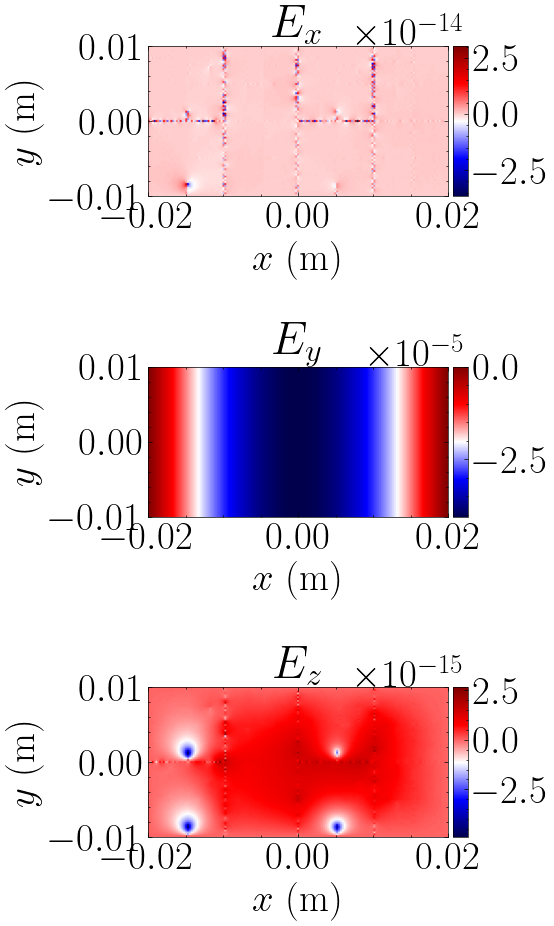

In [13]:
solver.plot_Efields()

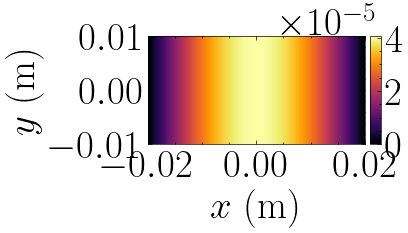

In [14]:
solver.plot_norm()